In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [30]:
df = pd.read_csv('audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

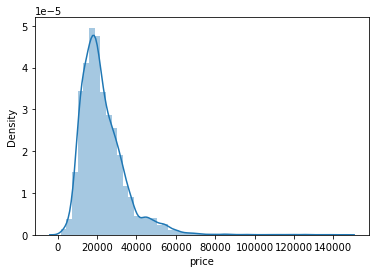

In [31]:
sns.distplot(a=df['price'], kde=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

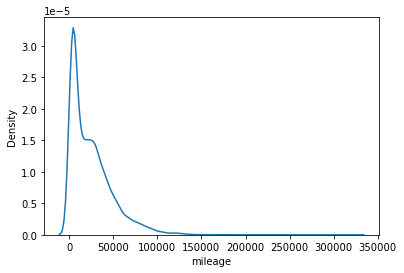

In [10]:
sns.kdeplot(data=df['mileage'])
plt.show

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

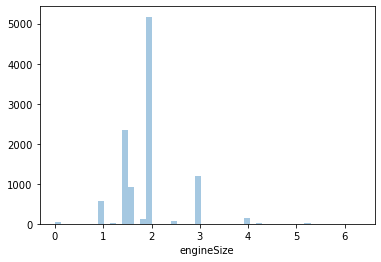

In [32]:
sns.distplot(a=df['engineSize'], kde=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

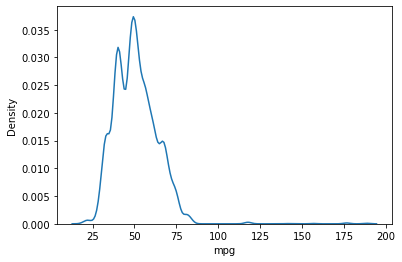

In [29]:
sns.kdeplot(data=df['mpg'])
plt.show

# Shapiro test

In [22]:
from scipy.stats import shapiro

stat, p = shapiro(df['price'])

print(stat)
print(p)

if p<0.05:
    print('probably not gaussian')
else:
    print('probably gaussian')

0.8517175912857056
0.0
probably not gaussian


# Anderson test

In [24]:
from scipy.stats import anderson

result = anderson(df['price'])

print(result.statistic)
print(result.critical_values)
print(result.significance_level)

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('probably not Gausian at the %.1f%% level' % (sl))
        
        

279.43366088125185
[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]
probably not Gausian at the 15.0% level
probably not Gausian at the 10.0% level
probably not Gausian at the 5.0% level
probably not Gausian at the 2.5% level
probably not Gausian at the 1.0% level


# Pearson r test

In [26]:
from scipy.stats import pearsonr

stat, p  = pearsonr(df['mileage'], df['price'])

print(stat)
print(p)

if p > 0.05:
    print('probably independent')
else:
    print('probably dependent')

-0.5353570952322908
0.0
probably dependent


# Spearman’s Rank Correlation

In [28]:
from scipy.stats import spearmanr

stat,p  = spearmanr(df['mileage'], df['price'])

print(stat)
print(p)

if p >0.05:
    print('probaby independent')
else:
    print('probably dependent')

-0.7091195518050414
0.0
probably dependent


# Chi2 test

In [5]:
from scipy.stats import chi2_contingency

table = df.groupby('transmission').count().fuelType

stat, p, dof, expected = chi2_contingency(table)

print(stat)
print(p)
print(dof)
print(expected)

if p>0.05:
    print('probably independent')
else:
    print('probably dependent')

0.0
1.0
0
[2708. 4369. 3591.]
probably independent


# Augmented Dickey-Fuller Unit Root Test

In [4]:
from statsmodels.tsa.stattools import adfuller

stat, p, lags, obs, crit, t = adfuller(df['price'])

print(stat)
print(p)
print(crit)
print(t)

if p>0.05:
    print('probably non-stationary')
else:
    print('probably stationary')

-8.619758805059679
6.150431993830084e-14
{'1%': -3.430965149005243, '5%': -2.861811861050357, '10%': -2.566914706496526}
227381.01725274266
probably stationary


# T-test 

In [10]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(df['mileage'], df['mpg'])

print(stat)
print(p)

if p>0.05:
    print('probably same distribution')
else:
    print('probably different distributions')   

108.87193213561049
0.0
probably different distributions


# Paired t-test

In [13]:
from scipy.stats import ttest_rel

stat, p = ttest_rel(df['mileage'], df['mpg'])

print(stat)
print(p)

if p>0.05:
    print('probably samples are equal')
else:
    print('probably sample are not equal')

108.89563854589106
0.0
probably sample are not equal


# ANOVA test

In [28]:
from scipy.stats import f_oneway

stat, p = f_oneway(df['mileage'], df['mpg'])

print(f'stat for the sample is {stat}')
print(f'p value of the test is {p}')

if p>0.05:
    print('both sample having same mean')
else:
    print('both samples having differance mean')

stat for the sample is 11853.097606940977
p value of the test is 0.0
both samples having differance mean
